# Exploratory Data Analysis
## Notes:
- Data was scraped from three websites using **Beautiful Soup** and **Selenium**:
    * **[Levels.fyi](https://www.levels.fyi/)** for salary data
    * **Salary.com** for cost of living data (shown as a % higher or lower than the national average)
    * **Wikipedia** for company data (public vs. private company; date company was founded; number of employees) 
- Company names were cleaned and standardized using string methods
- Observations with cities outside of the US were dropped
- ```Focus_area``` (data from Levels.fyi) originally included ~70 unique entries. These were bucketed into 8 groups in a new column, ```Focus_area2```


In [1]:
# Make better use of Jupyter Notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pickle

In [3]:
def read_data(csv_file):
    '''
    Reads in CSV file of data and cleans column names.
    Returns a dataframe.
    '''
    df_orig = pd.read_csv(csv_file)
    df_orig.columns = [column.strip() for column in df_orig.columns]
    return df_orig

In [4]:
df_orig = read_data('scraped_data.csv')
df_orig.head()

,Company,Location,Title_level,Focus_area,Yrs_at_company,Yrs_wk_exp,Total_comp,Cost_of_living(%),Focus_area2,pvt_pub,company_age,employees
0,Wayfair,"Boston, MA",L3,ML / AI,1.0,4,207000,39.5,ML/AI,Public,17,12124
1,Wayfair,"Boston, MA",L2,ML / AI,1.0,4,156000,39.5,ML/AI,Public,17,12124
2,Wayfair,"Boston, MA",L1,ML / AI,0.0,0,110000,39.5,ML/AI,Public,17,12124
3,Wayfair,"Boston, MA",L2,ML / AI,1.0,1,150000,39.5,ML/AI,Public,17,12124
4,Amazon (company),"Boston, MA",L5,ML / AI,0.5,3,210000,39.5,ML/AI,Public,25,798000


In [5]:
# make sure it's the datatypes and  # of rows/columns we're expecting!
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            658 non-null    object 
 1   Location           658 non-null    object 
 2   Title_level        658 non-null    object 
 3   Focus_area         658 non-null    object 
 4   Yrs_at_company     658 non-null    float64
 5   Yrs_wk_exp         658 non-null    int64  
 6   Total_comp         658 non-null    int64  
 7   Cost_of_living(%)  658 non-null    float64
 8   Focus_area2        658 non-null    object 
 9   pvt_pub            658 non-null    object 
 10  company_age        658 non-null    int64  
 11  employees          658 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 61.8+ KB


In [6]:
df_orig.describe()

,Yrs_at_company,Yrs_wk_exp,Total_comp,Cost_of_living(%),company_age,employees
count,658.000000,658.000000,658.000000,658.000000,658.000000,6.580000e+02
mean,2.007371,4.992401,229401.215805,41.979027,34.823708,2.175462e+05
std,2.480702,4.354001,106916.360709,24.323866,29.332232,3.575865e+05
min,0.000000,0.000000,36000.000000,-21.500000,2.000000,3.000000e+02
25%,0.500000,2.000000,160500.000000,18.800000,16.000000,1.500000e+04
50%,1.000000,4.000000,207500.000000,51.400000,25.000000,1.102000e+05
75%,3.000000,7.000000,265000.000000,62.500000,45.000000,1.511630e+05
max,27.000000,36.000000,900000.000000,83.000000,175.000000,2.200000e+06


#### As noted above, ```Focus_area2``` is comprised of 8 buckets after having grouped ~70 entries from the original  ```Focus_area``` data

In [7]:
df_orig['Focus_area2'].nunique()

8

In [8]:
df_orig['Focus_area2'].value_counts()

ML/AI           444
data science     76
analytics        49
engineering      45
product          28
mobile           11
HR/mktg           3
ux                2
Name: Focus_area2, dtype: int64

## Basic exploration of average values 
- Looking at the ```Focus_area2``` variable, compensation in Mobile and Product areas is on the higher end; whereas comp in UX and HR/Marketing areas is on the lower end

In [9]:
df_orig.groupby('Focus_area2').mean()

,Yrs_at_company,Yrs_wk_exp,Total_comp,Cost_of_living(%),company_age,employees
Focus_area2,,,,,,
HR/mktg,1.666667,7.666667,206666.666667,47.933333,34.666667,24072.666667
ML/AI,1.861824,4.572072,226801.801802,39.273198,37.662162,253212.065315
analytics,1.265306,4.857143,217938.775510,48.224490,21.020408,120431.163265
data science,2.342105,5.368421,229986.842105,48.309211,25.434211,131978.052632
engineering,3.137778,7.844444,241288.888889,45.675556,41.244444,173726.577778
mobile,2.272727,6.636364,282727.272727,48.409091,30.090909,164803.545455
product,2.892857,5.428571,253857.142857,47.867857,30.214286,175497.428571
ux,1.000000,4.000000,196000.000000,39.200000,46.000000,85548.000000


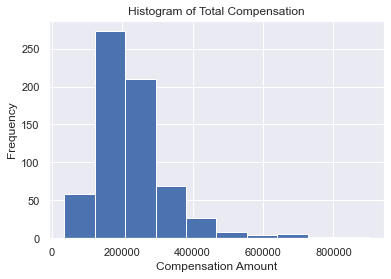

In [10]:
# histogram of Total_comp
df_orig.Total_comp.hist()
plt.title('Histogram of Total Compensation')
plt.xlabel('Compensation Amount')
plt.ylabel('Frequency');

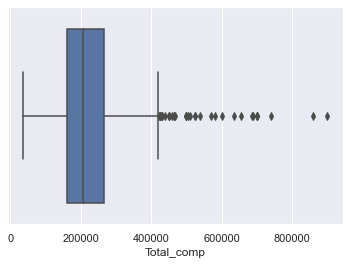

In [11]:
# boxplot of Total_comp for another view
sns.boxplot(df_orig.Total_comp);

In [12]:
mean = float(np.mean(df_orig.Total_comp))
std = float(np.std(df_orig.Total_comp))

[x for x in df_orig.Total_comp if (x < mean - 4*std) or (x > mean + 4*std)]

[740000, 700000, 690000, 685000, 700000, 900000, 700000, 858000]

In [13]:
# # SEE IF WE GET SAME NUMBERS -- THEN CONSIDER REMOVING OUTLIERS

# removing outliers that are 4 standard deviations away
# df = df[df.Total_comp >= 685000]
# df.shape()

# # shape should decrease from 658 rows to 650

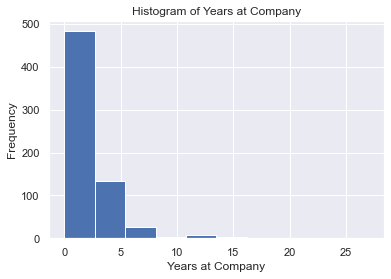

In [14]:
# histogram of Yrs_at_company
df_orig.Yrs_at_company.hist()
plt.title('Histogram of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency');

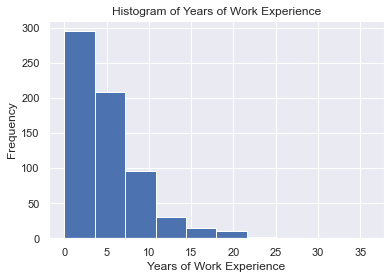

In [15]:
# histogram of Yrs_wk_exp
df_orig.Yrs_wk_exp.hist()
plt.title('Histogram of Years of Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Frequency');

## Create smaller dataframe to work with
- excluded ```Company```, ```Location```, ```Title_level```

In [16]:
smaller_df = df_orig.loc[:,['Yrs_at_company', 'Yrs_wk_exp', 'Total_comp', 'Cost_of_living(%)', 
                            'Focus_area2', 'pvt_pub', 'company_age', 'employees']]
smaller_df.head()

,Yrs_at_company,Yrs_wk_exp,Total_comp,Cost_of_living(%),Focus_area2,pvt_pub,company_age,employees
0,1.0,4,207000,39.5,ML/AI,Public,17,12124
1,1.0,4,156000,39.5,ML/AI,Public,17,12124
2,0.0,0,110000,39.5,ML/AI,Public,17,12124
3,1.0,1,150000,39.5,ML/AI,Public,17,12124
4,0.5,3,210000,39.5,ML/AI,Public,25,798000


In [17]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Yrs_at_company     658 non-null    float64
 1   Yrs_wk_exp         658 non-null    int64  
 2   Total_comp         658 non-null    int64  
 3   Cost_of_living(%)  658 non-null    float64
 4   Focus_area2        658 non-null    object 
 5   pvt_pub            658 non-null    object 
 6   company_age        658 non-null    int64  
 7   employees          658 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 41.2+ KB


## Dummying ```Focus_area2``` and ```pvt_pub```
- 'data science' will be the baseline focus area
- 'Public' will be dropped since it's the bigger group of the two in ```pvt_pub```

In [18]:
df_dummies = pd.get_dummies(smaller_df, prefix='dmy')
df_dummies.head()

,Yrs_at_company,Yrs_wk_exp,Total_comp,Cost_of_living(%),company_age,employees,dmy_HR/mktg,dmy_ML/AI,dmy_analytics,dmy_data science,dmy_engineering,dmy_mobile,dmy_product,dmy_ux,dmy_Private,dmy_Public
0,1.0,4,207000,39.5,17,12124,0,1,0,0,0,0,0,0,0,1
1,1.0,4,156000,39.5,17,12124,0,1,0,0,0,0,0,0,0,1
2,0.0,0,110000,39.5,17,12124,0,1,0,0,0,0,0,0,0,1
3,1.0,1,150000,39.5,17,12124,0,1,0,0,0,0,0,0,0,1
4,0.5,3,210000,39.5,25,798000,0,1,0,0,0,0,0,0,0,1


In [19]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Yrs_at_company     658 non-null    float64
 1   Yrs_wk_exp         658 non-null    int64  
 2   Total_comp         658 non-null    int64  
 3   Cost_of_living(%)  658 non-null    float64
 4   company_age        658 non-null    int64  
 5   employees          658 non-null    int64  
 6   dmy_HR/mktg        658 non-null    uint8  
 7   dmy_ML/AI          658 non-null    uint8  
 8   dmy_analytics      658 non-null    uint8  
 9   dmy_data science   658 non-null    uint8  
 10  dmy_engineering    658 non-null    uint8  
 11  dmy_mobile         658 non-null    uint8  
 12  dmy_product        658 non-null    uint8  
 13  dmy_ux             658 non-null    uint8  
 14  dmy_Private        658 non-null    uint8  
 15  dmy_Public         658 non-null    uint8  
dtypes: float64(2), int64(4), u

In [20]:
# dropping a dummy from each category dummied
df = df_dummies.drop(columns=['dmy_data science', 'dmy_Public'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Yrs_at_company     658 non-null    float64
 1   Yrs_wk_exp         658 non-null    int64  
 2   Total_comp         658 non-null    int64  
 3   Cost_of_living(%)  658 non-null    float64
 4   company_age        658 non-null    int64  
 5   employees          658 non-null    int64  
 6   dmy_HR/mktg        658 non-null    uint8  
 7   dmy_ML/AI          658 non-null    uint8  
 8   dmy_analytics      658 non-null    uint8  
 9   dmy_engineering    658 non-null    uint8  
 10  dmy_mobile         658 non-null    uint8  
 11  dmy_product        658 non-null    uint8  
 12  dmy_ux             658 non-null    uint8  
 13  dmy_Private        658 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 36.1 KB


## Some more visualizations

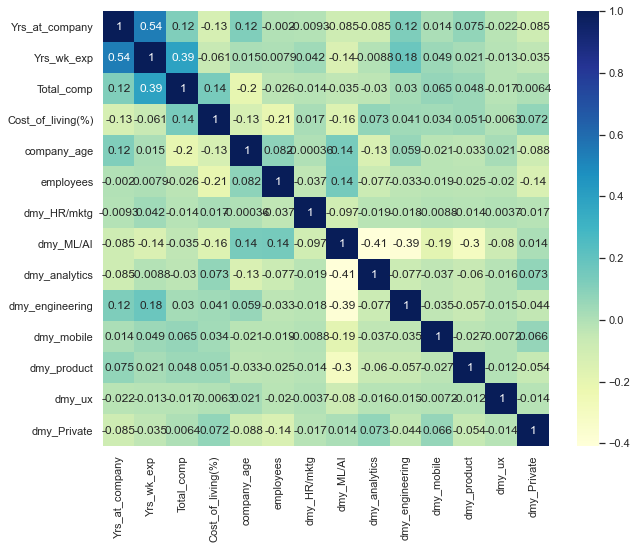

In [21]:
correlation = df.corr() #corr() method of pandas library calculates correlation between columns of dataframe
plt.figure(figsize = (10,8))
sns.heatmap(correlation,cmap="YlGnBu",annot=True)
plt.show()

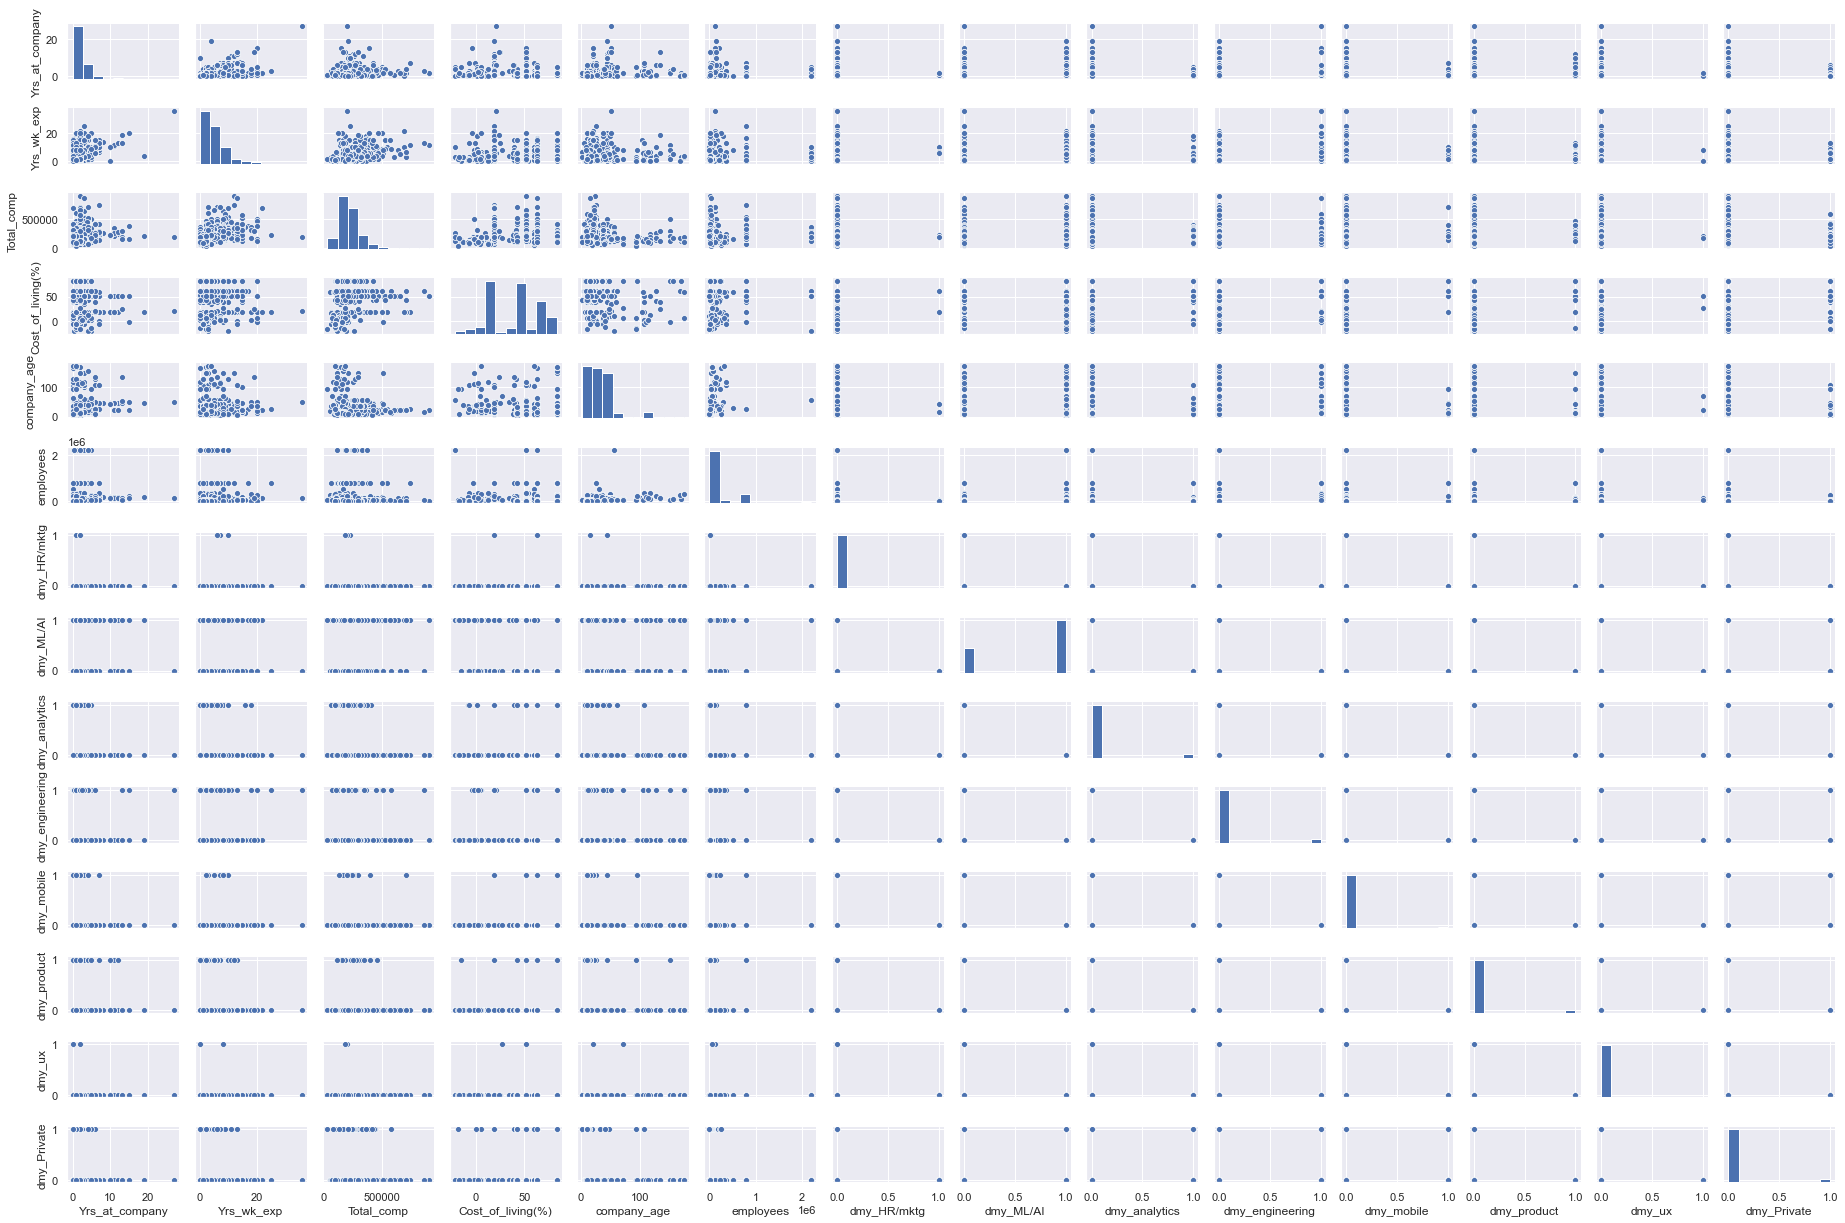

In [22]:
# pairplotting to see outstanding correlations
sns.pairplot(df, height=1.2, aspect=1.5);

In [23]:
# pickle dataframe for modeling notebook (2_Linear_Regression)
df.to_pickle('df.pkl')